# Set Up:

To Do:

- Project Idea: Error vs Complexity

- Classifiers Needed:
  
  - kNN, logistic, feedforward neural networks (with at least 1 hidden layer), and KMeans Clustering (Other Classifier)

In [ ]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

In [ ]:
pip install ucimlrepo

# K Nearest Neighbor

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)

# twp features of each patient
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features

# if the patients were readmitted
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

print(X.columns)        # find all of the columns
print(len(X.columns))   # finds the number of columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')
47


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# Get the target feature ("readmitted")
# model should predict whether a patient is readmitted to the hospital within 30 days of discharge

# prepare the target values
target_mapping = {'>30': 2, '<30': 1, 'NO': 0}
y.replace(target_mapping, inplace=True)

# replace missing values with Nan
X.replace("?", np.nan, inplace=True)

# find relevant columns (if the majority of the column contains 'No' or 'None'
# remove that column bc it prob won't provide useful information for analysis
print("List of Dropped Features:")

for column in X.columns:
    empty_count = X[column].isin(['No', 'None']).sum()
    total_values = X[column].notnull().sum()

    if (empty_count / total_values) > 0.6:
        print(column)
        X.drop(column, axis=1, inplace=True)

# get all the remaining features that are non numeric and convert them to numeric types

non_numeric_features = X.select_dtypes(exclude=['number']).columns
print(non_numeric_features)           # shows us the non numeric features
print(len(non_numeric_features))      # the number of non numeric features

#convert all categorical values to integers

le = LabelEncoder()

for column in non_numeric_features:
    X[column] = le.fit_transform(X[column])

X.fillna(X.mean(), inplace=True)    # replace missing values with the mean of the column

In [ ]:
# X

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)

print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(76324, 23) (25442, 23) (76324, 1) (25442, 1)


In [ ]:
plot_kwargs = {'cmap': 'viridis',
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}


# Plotting different k values
# figure, axes = plt.subplots(2, 2, figsize=(8, 8))

# k_vals = [1, 5, 10, 15]
# for i, k in enumerate(k_vals):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_tr, y_tr)

#     DecisionBoundaryDisplay.from_estimator(knn, X_tr, ax=axes[i//2, i%2], **plot_kwargs)

#     axes[i//2, i%2].scatter(X_tr["num_procedures"], X_tr["num_medications"])
#     axes[i//2, i%2].set_title(f'k: {k}')


# Plotting one singular k value
knn = KNeighborsClassifier(n_neighbors=25) # or 100 (but may be overfitting)
knn.fit(X_tr, y_tr)
DecisionBoundaryDisplay.from_estimator(knn, X_tr, **plot_kwargs)
plt.scatter(X_tr["num_procedures"], X_tr["num_medications"])

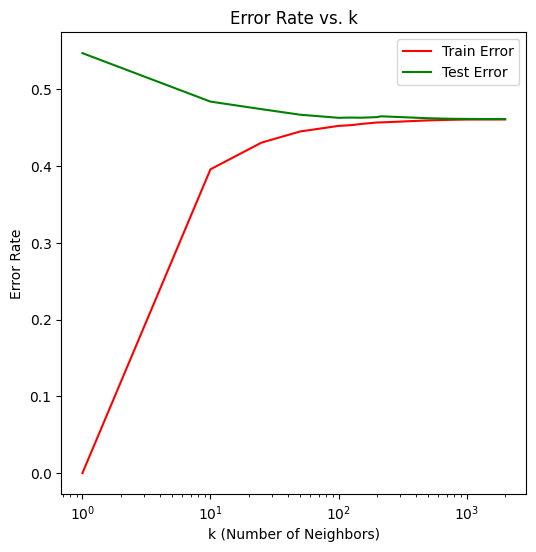

In [ ]:
from sklearn.metrics import accuracy_score
# Create a figure with only one subplot
figure, axes = plt.subplots(1, figsize=(6, 6))

k_values = [1, 10, 25, 50, 100, 125, 150, 200, 215, 500, 750, 1000, 1250, 2000]
train_errors = []
test_errors = []

for k in k_values:
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr, np.ravel(y_tr))

    # Make predictions
    y_train_pred = knn.predict(X_tr)
    y_test_pred = knn.predict(X_te)

    # Calculate error rates
    train_error = 1 - accuracy_score(y_tr, y_train_pred)
    test_error = 1 - accuracy_score(y_te, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting on a semi-log scale
plt.semilogx(k_values, train_errors, label='Train Error', color='red')
plt.semilogx(k_values, test_errors, label='Test Error', color='green')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k')
plt.legend()
plt.show()
print()

In [ ]:
print(f"Train Error Lowest K Value: {k_values[train_errors.index(min(train_errors))]}\n Train Error Lowest Value: {min(train_errors)}")
print(f"\n\nTest Error Lowest K Value: {k_values[test_errors.index(min(test_errors))]}\n Test Error Lowest Value: {min(test_errors)}\n")

Train Error Lowest K Value: 100
 Train Error Lowest Value: 0.46010429222787064


Test Error Lowest K Value: 100
 Test Error Lowest Value: 0.4600660325446113

